<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_04_Joins_Sets_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to the Movie Database
For this chapter, we'll be using a database based on data from the Internet Movie Database (IMDB). The full dataset is available here: https://developer.imdb.com/non-commercial-datasets/. We'll just be using a small part of this data, based on movies that have (at one point or another) been in the "top 100" in terms of box office returns.

To start off with, we need to download a copy of the database and connect to it:

In [1]:
!pip install sqlalchemy_schemadisplay # necessary for graphs
!pip install SQLAlchemy==1.3.24 # Downgrade to avoid problems with more recent version

# Now let's download the file we'll be using for this lab
!wget -N 'https://github.com/brendanpshea/database_sql/raw/main/data/movie.sqlite' -q

%load_ext sql
%sql sqlite:///movie.sqlite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy_schemadisplay: filename=sqlalchemy_schemadisplay-1.3-py3-none-any.whl size=5909 sha256=c81f496f31b9e42d9292fbdb140ab62cce62dbb9f502c2f1a5ceff15c4889863
  Stored in directory: /root/.cache/pip/wheels/0c/f7/e8/6f10d97bf57730bac61edef2341bb4ed47456c9b81f47f8c8c
Successfully built sqlalchemy_schemadisplay
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 69.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SQLAlchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1268260 sha256=9d11e359ea74c47ec3a62a07b06075b1f780d482d4a0e3b0deec44d31b952ebf
  Stored in directory: /root/.cache/pip/wheels/27/51/b3/3481e88d5a5ba95dd4aafedc9316774d941c4ba61cfb93add8
Successfully built SQLAlche

### Exploring the Data
Now, we can take a look at the data to see what tables, attributes, and relationships are present. First, we'll display the table "schema" (the list of tables:

In [3]:
# Now let's diplay the table schema
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///movie.sqlite
Done.


name
Movie
Person
Actor
Director
Oscar


Now, using our knowledge of the table names, we can display the first few rows of each table. (Note: I've used a bit of "Python" here to format things a bit more nicely):

In [4]:
# Show the first 5 rows of each table
movie_df = %sql SELECT * FROM Movie LIMIT 5;
person_df = %sql SELECT * FROM Person LIMIT 5;
actor_df = %sql SELECT * FROM Actor LIMIT 5;
director_df = %sql SELECT * FROM Director LIMIT 5;
oscar_df = %sql SELECT * FROM Oscar LIMIT 5;
print('\nMovie\n', movie_df,'\nPerson\n',person_df, '\nActor\n', actor_df,
      '\nDirector\n', director_df, '\nOscar\n', oscar_df)

 * sqlite:///movie.sqlite
Done.
 * sqlite:///movie.sqlite
Done.
 * sqlite:///movie.sqlite
Done.
 * sqlite:///movie.sqlite
Done.
 * sqlite:///movie.sqlite
Done.

Movie
 +---------+------------------------------+------+--------+---------+-------+---------------+
|    id   |             name             | year | rating | runtime | genre | earnings_rank |
+---------+------------------------------+------+--------+---------+-------+---------------+
| 2488496 | Star Wars: The Force Awakens | 2015 | PG-13  |   138   |   A   |       1       |
| 4154796 |      Avengers: Endgame       | 2019 | PG-13  |   181   |  AVS  |       2       |
| 1087260 |   Spider-Man: No Way Home    | 2021 | PG-13  |   148   |  AVFS |       3       |
| 0499549 |            Avatar            | 2009 | PG-13  |   162   |  AVYS |       4       |
| 1745960 |      Top Gun: Maverick       | 2022 | PG-13  |   130   |   AD  |       5       |
+---------+------------------------------+------+--------+---------+-------+------------

### Summary: Movie data
The Movie Database consists of five tables that store information about movies the people (actors and directors) involved in the movies, as well as Oscar awards. Let's dive into the details of each table and their relationships.

1.  Movie: This table contains information about movies, including their ID, name, release year, rating, runtime, genre, and earnings rank. The `id` column serves as the primary key, which uniquely identifies each movie. The `year`, `runtime`, and `earnings_rank` columns are stored as integers, while `name`, `rating`, and `genre` are stored as text.

2.  Person: The Person table holds information about people involved in the movie industry, such as actors and directors. Each person has a unique ID, name, date of birth (dob), and place of birth (pob). The `id` column is the primary key, and the `name`, `dob`, and `pob` columns are stored as text. The date of birth is formatted as 'YYYY-MM-DD'.

3.  Actor: The Actor table serves as a relationship table between movies and actors. It contains two columns: `actor_id` and `movie_id`. The `actor_id` corresponds to the `id` in the Person table, and the `movie_id` corresponds to the `id` in the Movie table. This table allows us to identify which actors appeared in which movies.

4.  Director: Similar to the Actor table, the Director table represents the relationship between movies and directors. It has two columns: `director_id` and `movie_id`. The `director_id` corresponds to the `id` in the Person table, and the `movie_id` corresponds to the `id` in the Movie table. This table helps us determine who directed which movies.

5.  Oscar: The Oscar table contains information about the Oscar awards, including the `movie_id`, `person_id`, award `type`, and the award `year`. The `movie_id` corresponds to the `id` in the Movie table, and the `person_id` corresponds to the `id` in the Person table. The `type` column is stored as text and represents the category of the award, such as 'BEST-ACTOR' or 'BEST-PICTURE'. The `year` column is an integer that represents the year the award was given.

The relationships among these tables are established through foreign keys. In the Actor and Director tables, `actor_id` and `director_id` reference the `id` in the Person table, while `movie_id` in the Actor, Director, and Oscar tables reference the `id` in the Movie table. These relationships enable us to query and analyze the data in various ways, such as finding all movies a specific actor has appeared in or all movies directed by a particular director.

### An Entity-Relationship Diagram of the Movie Data
To help us better understand the stucture of the movie data, let's create an **entity-relationship** diagram.

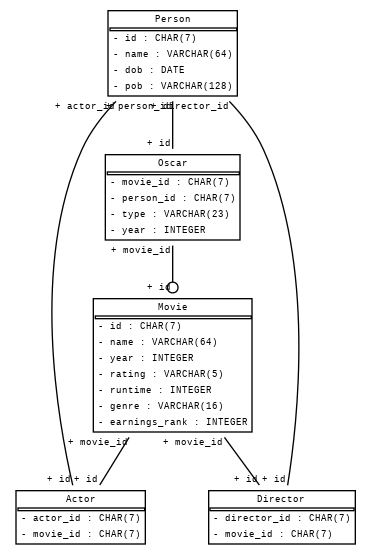

In [5]:

from sqlalchemy import create_engine, MetaData
from sqlalchemy_schemadisplay import create_schema_graph
from IPython.display import Image

# Replace this line with your SQLite database file path
database_url = 'sqlite:///movie.sqlite'

# Connect to the database
engine = create_engine(database_url)
metadata = MetaData(engine)

# Generate the ERD diagram
graph = create_schema_graph(metadata=metadata, show_datatypes=True, show_indexes=True)

# Save the ERD diagram as a PNG image
graph.write_png('erd_diagram.png')

Image(filename='erd_diagram.png')